In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
print(torch.__version__)  

# Data from House Prices: Advanced Regression Techniques
# Cleaned Data
X_train_pd = pd.read_csv('X_train_HP.csv')
y_train_pd = pd.read_csv('y_train_HP.csv')
X_cv_pd = pd.read_csv('X_cv_HP.csv')
y_cv_pd = pd.read_csv('y_cv_HP.csv')
test_pd = pd.read_csv('test_skew_HP.csv')

# Convert to tensor and check Datatype

X_t = torch.from_numpy(X_train_pd.values)
y_t = torch.from_numpy(y_train_pd.values)
X_cv = torch.from_numpy(X_cv_pd.values)
y_cv = torch.from_numpy(y_cv_pd.values)
test = torch.from_numpy(test_pd.values)

X_t.type()

1.13.1


'torch.DoubleTensor'

# Neural Network
*(Linear Regression with PyTorch)*

Epoch [10/100], Train Loss: 0.0462, CV Loss: 0.1487
Epoch [20/100], Train Loss: 0.7415, CV Loss: 0.1060
Epoch [30/100], Train Loss: 0.0514, CV Loss: 0.1101
Epoch [40/100], Train Loss: 0.0226, CV Loss: 0.0788
Epoch [50/100], Train Loss: 0.0076, CV Loss: 0.0410
Epoch [60/100], Train Loss: 0.0220, CV Loss: 0.0334
Epoch [70/100], Train Loss: 0.1758, CV Loss: 0.0168
Epoch [80/100], Train Loss: 0.0228, CV Loss: 0.0094
Epoch [90/100], Train Loss: 0.0018, CV Loss: 0.0121
Epoch [100/100], Train Loss: 0.0063, CV Loss: 0.0014


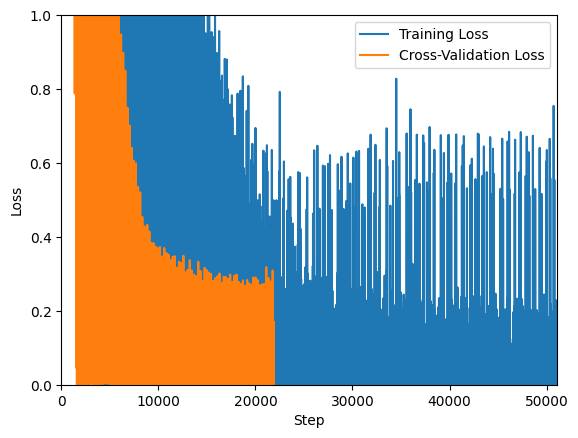

In [29]:
def Abstract_2(X, y, X_cv, y_cv, test, batch_size, epochs, lr):
    # Model
    model = nn.Sequential(
        # Input Layer
        nn.Linear(X.shape[1], 32),
        nn.ReLU(),
        # Hidden Layers
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        # Output Layer
        nn.Linear(16, 1),
    )
    # Loss and Optimizer with L2 Regularization
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.004)

    # Create DataLoader for training data
    train_data = TensorDataset(torch.Tensor(X).float(), torch.Tensor(y).float())
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Create DataLoader for cross validation data
    cv_data = TensorDataset(torch.Tensor(X_cv).float(), torch.Tensor(y_cv).float())
    cv_loader = DataLoader(cv_data, batch_size=batch_size, shuffle=False)

    # Train the Model
    train_loss = []
    cv_loss = []
    for epoch in range(epochs):
        for i, (inputs, labels) in enumerate(train_loader):
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Store the loss values
            train_loss.append(loss.item())

        # Compute CV Loss
        with torch.no_grad():
            for inputs_cv, labels_cv in cv_loader:
                outputs_cv = model(inputs_cv)
                loss_cv = criterion(outputs_cv, labels_cv)
                cv_loss.append(loss_cv.item())

        # Print Loss and CV Loss every 10 epochs
        if (epoch+1) % 10 == 0:
            print ('Epoch [%d/%d], Train Loss: %.4f, CV Loss: %.4f' 
                   %(epoch+1, epochs, train_loss[-1], cv_loss[-1]))

    # Plot the loss curve
    plt.plot(train_loss, label='Training Loss')
    plt.plot(cv_loss, label='Cross-Validation Loss')
    plt.legend()
    plt.xlim(0, epochs*len(train_loader))
    plt.ylim(0, 1)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.show()

    # Save the Model
    torch.save(model.state_dict(), 'model_ab3.pkl')


Abstract_2(X_t, y_t, X_cv, y_cv, test, 2, 100, 0.00001)


Epoch [100/20000], Train Loss: 137.8675, CV Loss: 137.5326
Epoch [200/20000], Train Loss: 136.9357, CV Loss: 136.6036
Epoch [300/20000], Train Loss: 135.6904, CV Loss: 135.3615
Epoch [400/20000], Train Loss: 134.0932, CV Loss: 133.7755
Epoch [500/20000], Train Loss: 132.2973, CV Loss: 131.9967
Epoch [600/20000], Train Loss: 130.1938, CV Loss: 129.9204
Epoch [700/20000], Train Loss: 126.9563, CV Loss: 126.7066
Epoch [800/20000], Train Loss: 123.2443, CV Loss: 123.0304
Epoch [900/20000], Train Loss: 119.3798, CV Loss: 119.2003
Epoch [1000/20000], Train Loss: 115.2789, CV Loss: 115.1311
Epoch [1100/20000], Train Loss: 110.9107, CV Loss: 110.7985
Epoch [1200/20000], Train Loss: 106.2749, CV Loss: 106.2021
Epoch [1300/20000], Train Loss: 101.3722, CV Loss: 101.3393
Epoch [1400/20000], Train Loss: 96.2004, CV Loss: 96.2070
Epoch [1500/20000], Train Loss: 90.7626, CV Loss: 90.8088
Epoch [1600/20000], Train Loss: 85.0739, CV Loss: 85.1601
Epoch [1700/20000], Train Loss: 79.1629, CV Loss: 79.28

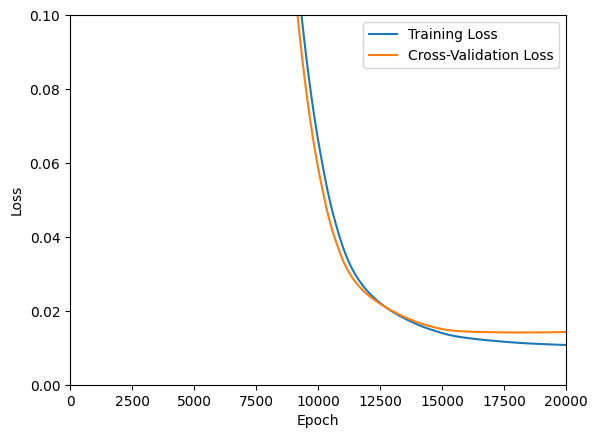

In [30]:
def Abstract_1(X, y, X_cv, y_cv, test, epochs, lr):
    # Model
    model = nn.Sequential(
        # Input Layer
        nn.Linear(X.shape[1], 32),
        nn.ReLU(),
        # Hidden Layers
        nn.Linear(32, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        # Output Layer
        nn.Linear(16, 1),
    )
    # Loss and Optimizer with L2 Regularization
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.004)

    # Train the Model
    train_loss = []
    cv_loss = []
    for epoch in range(epochs):

        # Forward pass
        outputs = model(X.float())
        outputs_cv = model(X_cv.float())
        loss = criterion(outputs, y.float())
        loss_cv = criterion(outputs_cv, y_cv.float())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the loss values
        train_loss.append(loss.item())
        cv_loss.append(loss_cv.item())

        # Print Loss and CV Loss
        if (epoch+1) % 100 == 0:
            print ('Epoch [%d/%d], Train Loss: %.4f, CV Loss: %.4f' 
                   %(epoch+1, epochs, loss.item(), loss_cv.item()))

    # Plot the loss curve
    plt.plot(train_loss, label='Training Loss')
    plt.plot(cv_loss, label='Cross-Validation Loss')
    plt.legend()
    plt.xlim(0, epochs)
    plt.ylim(0, 0.1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Save the Model
    torch.save(model.state_dict(), 'model_ab3.pkl')

# Call the function
Abstract_1(X_t, y_t, X_cv, y_cv, test, 20000, 0.00001)


In [ ]:
print(pred_ab1)

tensor([[11.6151],
        [11.9223],
        [12.1279],
        ...,
        [12.0634],
        [11.7053],
        [12.2495]], grad_fn=<AddmmBackward0>)


In [ ]:
# convert from 1logp format to normal p format
pred_ab1 = np.exp(pred_ab1.detach().numpy()) - 1
print(pred_ab1)

[[110757.51]
 [150579.28]
 [184954.33]
 ...
 [173404.97]
 [121211.25]
 [208871.3 ]]


In [ ]:
#Create csv file for submission
sub_df = pd.read_csv('sample_submission.csv', index_col = "Id")
sub_df["SalePrice"] = pred_ab1
sub_df.to_csv('submission_ab1_5.csv')
